In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/content/drive/MyDrive/OHCA.csv')#retrieve dataset from the google drive

In [ ]:
df['output'] = df['output'].replace([1, 2, 3, 4], 1)
df = df.drop(columns=['thal', 'ca'])

# Assuming df is your DataFrame containing the dataset
label_counts = df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)

Label Counts:
output
1    509
0    411
Name: count, dtype: int64


In [ ]:
# Identify rows containing "?"
rows_with_question_mark = df[df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the count and the rows containing "?"
print("Number of rows containing '?':", len(rows_with_question_mark))
print("Rows containing '?' details:\n", rows_with_question_mark)

# Remove rows containing "?"
df_cleaned = df[~df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Number of rows containing '?': 389
Rows containing '?' details:
       age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope  \
303  28.0  1.0  2.0      130  132   0       2     185     0     0.0     ?   
304  29.0  1.0  2.0      120  243   0       0     160     0     0.0     ?   
305  29.0  1.0  2.0      140    ?   0       0     170     0     0.0     ?   
306  30.0  0.0  1.0      170  237   0       1     170     0     0.0     ?   
307  31.0  0.0  2.0      100  219   0       1     150     0     0.0     ?   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ...   
915  54.0  0.0  4.0      127  333   1       1     154     0       0     ?   
916  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?   
917  55.0  1.0  4.0      122  223   1       1     100     0       0     ?   
918  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?   
919  62.0  1.0  2.0      120  254   0       2      93     1       0     ?   

     outpu

In [ ]:

# Replace '?' with NaN
df.replace(['?'], np.nan, inplace=True)

# List of categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope']

# List of numeric columns
numeric_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Replace missing values in categorical columns with mode
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

# Replace missing values in numeric columns with mean
for column in numeric_columns:
    mean_value = df[column].astype(float).mean()  # Convert to float before calculating mean
    df[column].fillna(mean_value, inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df)

'''
import numpy as np
import pandas as pd

# Replace '?' with NaN
df.replace(['?'], np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df_cleaned)
'''


Cleaned DataFrame:
       age  sex   cp    trestbps   chol  fbs restecg     thalach exang  \
0    63.0  1.0  1.0       145.0  233.0  1.0     2.0       150.0   0.0   
1    67.0  1.0  4.0       160.0  286.0  0.0     2.0       108.0   1.0   
2    67.0  1.0  4.0       120.0  229.0  0.0     2.0       129.0   1.0   
3    37.0  1.0  3.0       130.0  250.0  0.0     0.0       187.0   0.0   
4    41.0  0.0  2.0       130.0  204.0  0.0     2.0       172.0   0.0   
..    ...  ...  ...         ...    ...  ...     ...         ...   ...   
915  54.0  0.0  4.0         127    333    1       1         154     0   
916  62.0  1.0  1.0  132.132404    139    0       1  137.545665     0   
917  55.0  1.0  4.0         122    223    1       1         100     0   
918  58.0  1.0  4.0  132.132404    385    1       2  137.545665     0   
919  62.0  1.0  2.0         120    254    0       2          93     1   

      oldpeak slope  output  
0         2.3   3.0       0  
1         1.5   2.0       1  
2         2.6

'\nimport numpy as np\nimport pandas as pd\n\n# Replace \'?\' with NaN\ndf.replace([\'?\'], np.nan, inplace=True)\n\n# Drop rows with missing values\ndf_cleaned = df.dropna()\n\n# Display the cleaned DataFrame\nprint("Cleaned DataFrame:\n", df_cleaned)\n'

In [ ]:
# List of columns with mixed data types
columns_to_convert = ['age', 'sex', 'chol', 'thalach', 'trestbps', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Convert columns with mixed data types to integers
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: int(float(x)) if isinstance(x, str) else int(x))

# List of columns to convert to float
columns_to_convert_float = ['oldpeak']

# Convert 'oldpeak' column to float
for column in columns_to_convert_float:
    df[column] = df[column].astype(float)

df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0
6,62,0,4,140,268,0,2,160,0,3.6,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,1


In [ ]:
'''df['thal'] = df['thal'].replace([3, 6, 7], [0, 1, 2])
df['cp'] = df['cp'].replace([1, 2, 3, 4], [0, 1, 2, 3])
df['slope'] = df['slope'].replace([1, 2, 3, 4], [0, 1, 2, 3])'''

"df['thal'] = df['thal'].replace([3, 6, 7], [0, 1, 2])\ndf['cp'] = df['cp'].replace([1, 2, 3, 4], [0, 1, 2, 3])\ndf['slope'] = df['slope'].replace([1, 2, 3, 4], [0, 1, 2, 3])"

In [ ]:
# Identify duplicate rows
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
405   49    0   2       110   199    0        0      160      0      0.0   
907   58    1   3       150   219    0        1      118      1      0.0   

     slope  output  
405      2       0  
907      2       1  


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (918, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    int64  
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    int64  
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    int64  
 11  output    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [ ]:
import pandas as pd


label_counts = df['output'].value_counts()


print("Label Counts:")
print(label_counts)


Label Counts:
output
1    508
0    410
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
# Assuming you have a dataset stored in a variable df
# Extract features X and target variable y from the dataset
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

# Save the indices of the original dataset
original_indices = X.index

# Apply SMOTE to balance the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Get the indices of the resampled dataset
resampled_indices = X_resampled.index

# Get the indices of the synthetic samples (those not present in the original dataset)
synthetic_indices = resampled_indices.difference(original_indices)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Print the indices of the synthetic samples
print("\nIndices of synthetic samples:")
print(synthetic_indices)


Class distribution before SMOTE:
output
1    508
0    410
Name: count, dtype: int64

Class distribution after SMOTE:
output
0    508
1    508
Name: count, dtype: int64

Indices of synthetic samples:
Index([ 405,  907,  920,  921,  922,  923,  924,  925,  926,  927,  928,  929,
        930,  931,  932,  933,  934,  935,  936,  937,  938,  939,  940,  941,
        942,  943,  944,  945,  946,  947,  948,  949,  950,  951,  952,  953,
        954,  955,  956,  957,  958,  959,  960,  961,  962,  963,  964,  965,
        966,  967,  968,  969,  970,  971,  972,  973,  974,  975,  976,  977,
        978,  979,  980,  981,  982,  983,  984,  985,  986,  987,  988,  989,
        990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
       1014, 1015],
      dtype='int64')


In [ ]:
import pandas as pd

# Assuming X_resampled and y_resampled contain the resampled features and target variable
# Create a DataFrame for the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['output'] = y_resampled

# Extract the indices of the synthetic samples
synthetic_indices = resampled_indices.difference(original_indices)

# Create a DataFrame for the synthetic samples
synthetic_df = resampled_df.loc[synthetic_indices]

# Concatenate the original DataFrame with the synthetic DataFrame
combined_df = pd.concat([df, synthetic_df], axis=0)

# Now combined_df contains both the original and synthetic samples
print("Combined DataFrame:")
print(combined_df.head())

# Assuming df is your DataFrame containing the dataset
label_counts = combined_df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)


Combined DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   output  
0       0  
1       1  
2       1  
3       0  
4       0  
Label Counts:
output
0    508
1    508
Name: count, dtype: int64


In [ ]:
'''import pandas as pd

# Assuming df is your original DataFrame with the features and target variable
# Separate the minority and majority class samples
minority_df = df[df['output'] == 0]  # Assuming 0 represents the minority class
majority_df = df[df['output'] == 1]  # Assuming 1 represents the majority class

# Randomly sample the majority class to match the size of the minority class
majority_sampled = majority_df.sample(n=len(minority_df), replace=False, random_state=42)

# Combine the minority and sampled majority class samples
combined_df = pd.concat([minority_df, majority_sampled], axis=0)

# Now combined_df contains both the minority and sampled majority class samples
print("Combined DataFrame:")
print(combined_df.head())

# Assuming df is your DataFrame containing the dataset
label_counts = combined_df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)'''

'import pandas as pd\n\n# Assuming df is your original DataFrame with the features and target variable\n# Separate the minority and majority class samples\nminority_df = df[df[\'output\'] == 0]  # Assuming 0 represents the minority class\nmajority_df = df[df[\'output\'] == 1]  # Assuming 1 represents the majority class\n\n# Randomly sample the majority class to match the size of the minority class\nmajority_sampled = majority_df.sample(n=len(minority_df), replace=False, random_state=42)\n\n# Combine the minority and sampled majority class samples\ncombined_df = pd.concat([minority_df, majority_sampled], axis=0)\n\n# Now combined_df contains both the minority and sampled majority class samples\nprint("Combined DataFrame:")\nprint(combined_df.head())\n\n# Assuming df is your DataFrame containing the dataset\nlabel_counts = combined_df[\'output\'].value_counts()\n\n# Print the count of each label\nprint("Label Counts:")\nprint(label_counts)'

DT


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 84.25%
Training Error: 15.75%
Test Accuracy: 81.31%
Testing Error: 18.69%

True Positives (TP): 131
True Negatives (TN): 117
False Positives (FP): 33
False Negatives (FN): 24

Precision: 0.7987804878048781
Recall: 0.8451612903225807
F1-Score: 0.8213166144200628

Confusion Matrix:

            no cardiac  cardiac
no cardiac         131       24
cardiac             33      117



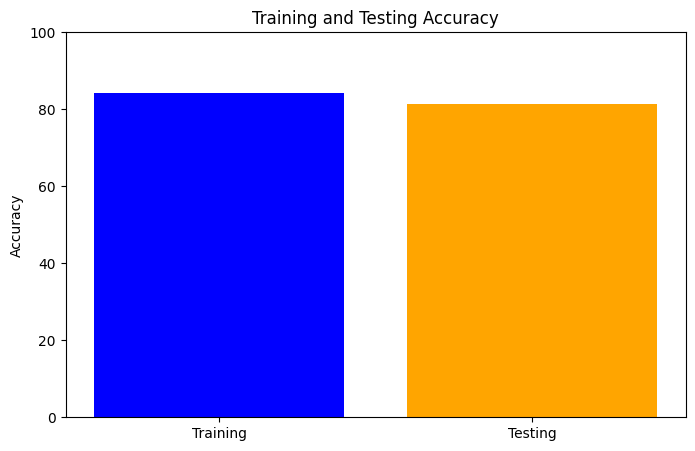


Sample 1: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 2: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0588, Class 1: 0.9412, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.1250, Class 1: 0.8750, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9667, Class 1: 0.0333, Prediction: 0
Sample 8: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 9: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 10: Probabilities - Class 0: 0.1250, Class 1: 0.8750, Prediction: 1
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.3529, Class 1: 0.6471, Prediction: 1
Sample 13: Probabilities - Class 0: 0.5385, Class 1: 0.4615, Prediction: 0
Sample 14: Probabilities - Class 

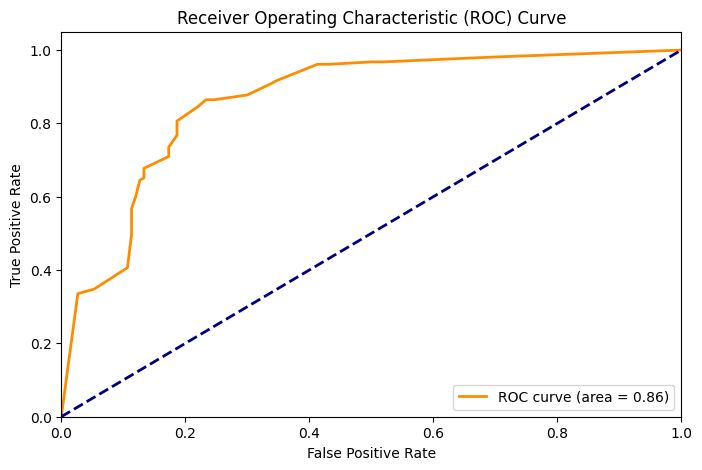

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=7, min_samples_split=4,
                    min_samples_leaf=12, max_features=None,
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["cardiac", "no cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 89.73%
Training Error: 10.27%
Test Accuracy: 80.00%
Testing Error: 20.00%

True Positives (TP): 125
True Negatives (TN): 119
False Positives (FP): 31
False Negatives (FN): 30

Precision: 0.8012820512820513
Recall: 0.8064516129032258
F1-Score: 0.8038585209003215

Confusion Matrix:

            no cardiac  cardiac
no cardiac         125       30
cardiac             31      119



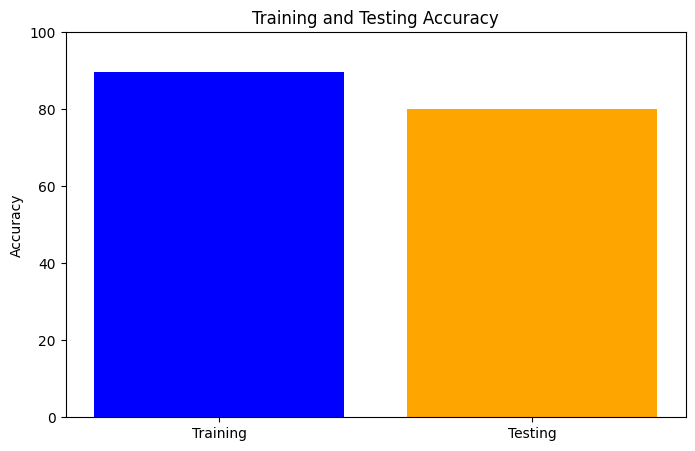


Sample 1: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 2: Probabilities - Class 0: 0.9500, Class 1: 0.0500, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.3077, Class 1: 0.6923, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9028, Class 1: 0.0972, Prediction: 0
Sample 8: Probabilities - Class 0: 0.2308, Class 1: 0.7692, Prediction: 1
Sample 9: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 10: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5000, Class 1: 0.5000, Prediction: 0
Sample 13: Probabilities - Class 0: 0.6250, Class 1: 0.3750, Prediction: 0
Sample 14: Probabilities - Class 

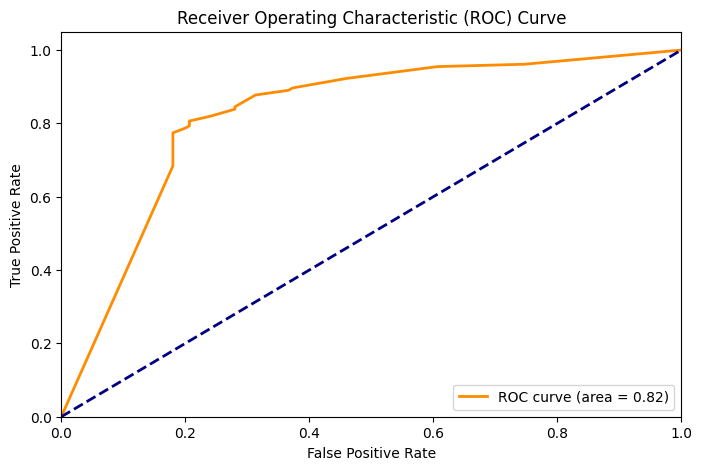

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=8, min_samples_split=3,
                    min_samples_leaf=2, max_features=0.5,
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["cardiac", "no cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.55

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 86.36%
Training Error: 13.64%
Test Accuracy: 79.67%
Testing Error: 20.33%

True Positives (TP): 130
True Negatives (TN): 113
False Positives (FP): 37
False Negatives (FN): 25

Precision: 0.7784431137724551
Recall: 0.8387096774193549
F1-Score: 0.8074534161490683

Confusion Matrix:

            no cardiac  cardiac
no cardiac         130       25
cardiac             37      113



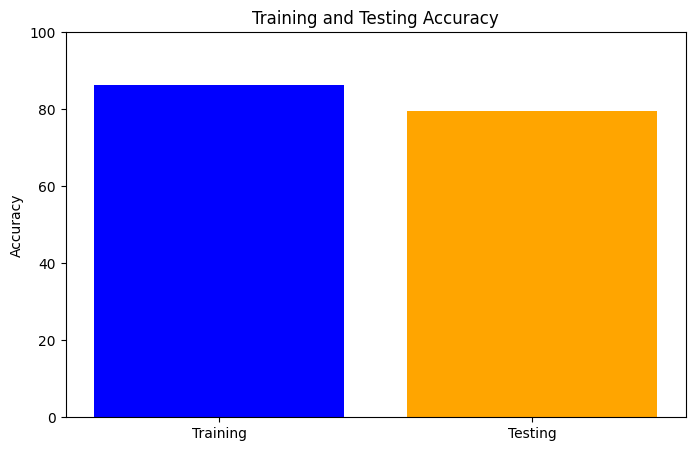


Sample 1: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 2: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.1111, Class 1: 0.8889, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 7: Probabilities - Class 0: 0.8000, Class 1: 0.2000, Prediction: 0
Sample 8: Probabilities - Class 0: 0.1250, Class 1: 0.8750, Prediction: 1
Sample 9: Probabilities - Class 0: 0.5000, Class 1: 0.5000, Prediction: 0
Sample 10: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.1111, Class 1: 0.8889, Prediction: 1
Sample 13: Probabilities - Class 0: 0.3333, Class 1: 0.6667, Prediction: 1
Sample 14: Probabilities - Class 

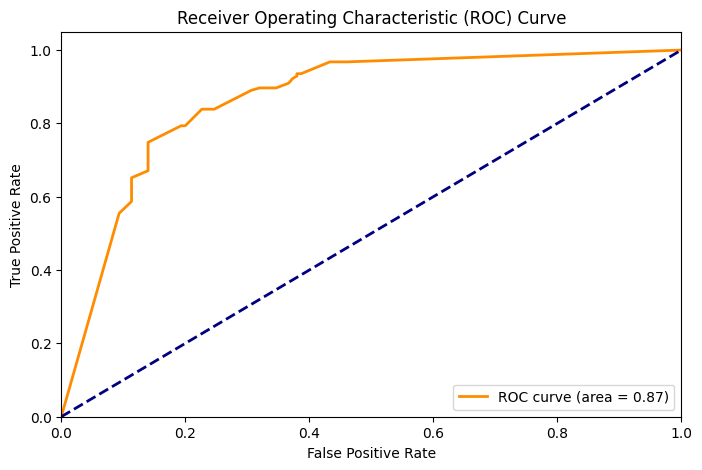

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=10, min_samples_split=6,
                    min_samples_leaf=5, max_features=0.5,
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["cardiac", "no cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.55

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NB

Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------
Gaussian Naive Bayes Model Metrics:

Training Accuracy: 81.15%
Training Error: 18.85%
Test Accuracy: 80.98%
Testing Error: 19.02%

True Positives (TP): 139
True Negatives (TN): 108
False Positives (FP): 42
False Negatives (FN): 16

Precision: 0.7679558011049724
Recall: 0.896774193548387
F1-Score: 0.8273809523809523

Confusion Matrix:

            cardiac  no cardiac
cardiac         139          16
no cardiac       42         108


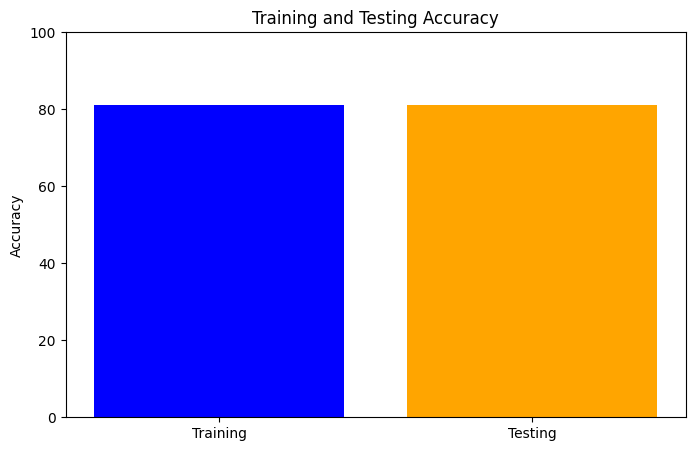


Sample 1: Probabilities - Class 0: 0.0079, Class 1: 0.9921, Prediction: 1
Sample 2: Probabilities - Class 0: 0.9626, Class 1: 0.0374, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0059, Class 1: 0.9941, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.2398, Class 1: 0.7602, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0001, Class 1: 0.9999, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9906, Class 1: 0.0094, Prediction: 0
Sample 8: Probabilities - Class 0: 0.0007, Class 1: 0.9993, Prediction: 1
Sample 9: Probabilities - Class 0: 0.8830, Class 1: 0.1170, Prediction: 0
Sample 10: Probabilities - Class 0: 0.9307, Class 1: 0.0693, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.6210, Class 1: 0.3790, Prediction: 0
Sample 13: Probabilities - Class 0: 0.0465, Class 1: 0.9535, Prediction: 1
Sample 14: Probabilities - Class 

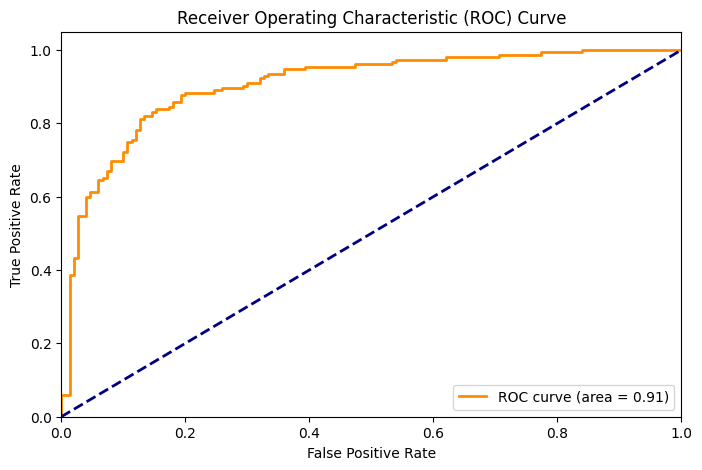

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Step 4-5: Hyperparameter tuning
nb_model.set_params(var_smoothing=1e-18, priors=[0.17, 0.83])
#0.22, 0.78
# Step 6: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("Gaussian Naive Bayes Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------

Gaussian Naive Bayes Model Metrics:
Training Accuracy: 82.14%
Training Error: 17.86%
Test Accuracy: 81.97%
Testing Error: 18.03%

True Positives (TP): 138
True Negatives (TN): 112
False Positives (FP): 38
False Negatives (FN): 17

Precision: 0.7840909090909091
Recall: 0.8903225806451613
F1-Score: 0.8338368580060423

Confusion Matrix:

            cardiac  no cardiac
cardiac         138          17
no cardiac       38         112


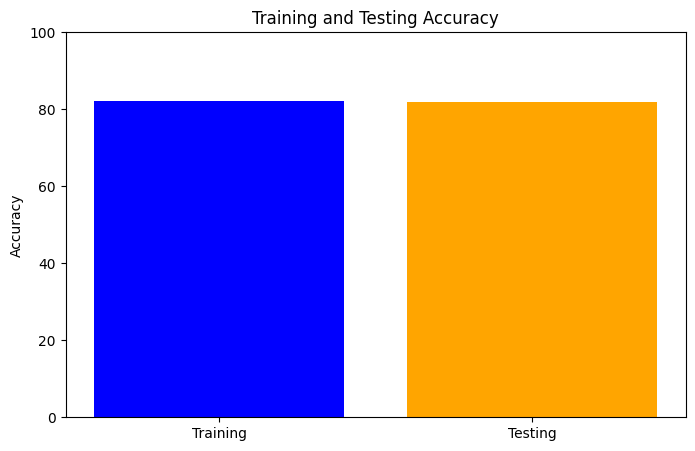


Sample 1: Probabilities - Class 0: 0.0103, Class 1: 0.9897, Prediction: 1
Sample 2: Probabilities - Class 0: 0.9709, Class 1: 0.0291, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0077, Class 1: 0.9923, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.2905, Class 1: 0.7095, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0001, Class 1: 0.9999, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9927, Class 1: 0.0073, Prediction: 0
Sample 8: Probabilities - Class 0: 0.0009, Class 1: 0.9991, Prediction: 1
Sample 9: Probabilities - Class 0: 0.9073, Class 1: 0.0927, Prediction: 0
Sample 10: Probabilities - Class 0: 0.9457, Class 1: 0.0543, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.6801, Class 1: 0.3199, Prediction: 0
Sample 13: Probabilities - Class 0: 0.0596, Class 1: 0.9404, Prediction: 1
Sample 14: Probabilities - Class 

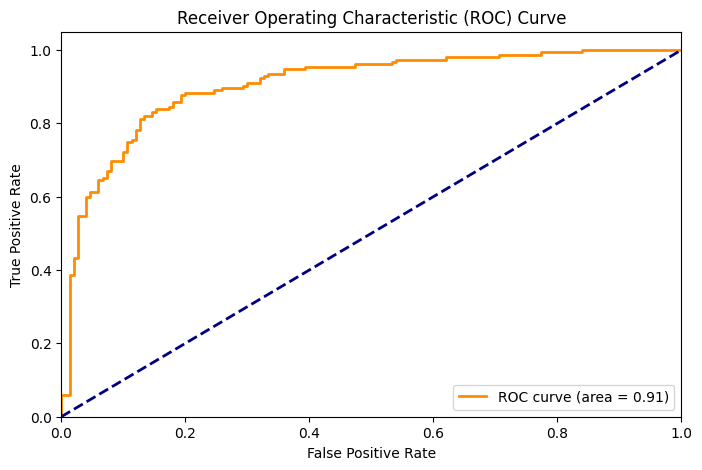

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

#Step 4-5: Hyperparameter Tuning
nb_model.set_params(var_smoothing=1e-79, priors=[0.21, 0.79])


# Step 4-5: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nGaussian Naive Bayes Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------
Gaussian Naive Bayes Model Metrics:

Training Accuracy: 80.03%
Training Error: 19.97%
Test Accuracy: 80.00%
Testing Error: 20.00%

True Positives (TP): 141
True Negatives (TN): 103
False Positives (FP): 47
False Negatives (FN): 14

Precision: 0.75
Recall: 0.9096774193548387
F1-Score: 0.8221574344023324

Confusion Matrix:

            cardiac  no cardiac
cardiac         141          14
no cardiac       47         103


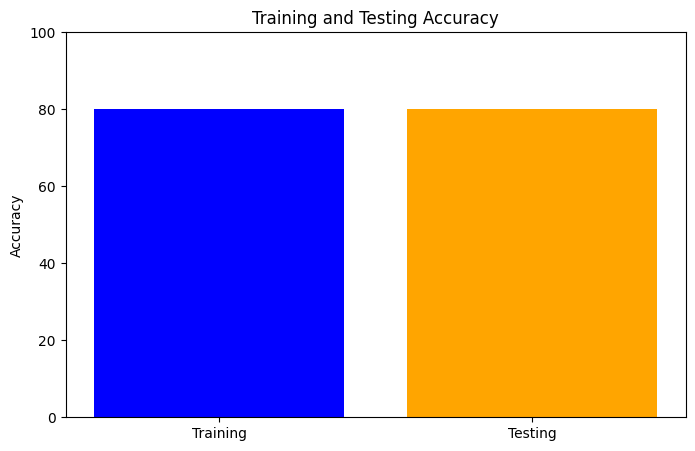


Sample 1: Probabilities - Class 0: 0.0053, Class 1: 0.9947, Prediction: 1
Sample 2: Probabilities - Class 0: 0.9448, Class 1: 0.0552, Prediction: 0
Sample 3: Probabilities - Class 0: 0.0039, Class 1: 0.9961, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 5: Probabilities - Class 0: 0.1736, Class 1: 0.8264, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0001, Class 1: 0.9999, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9859, Class 1: 0.0141, Prediction: 0
Sample 8: Probabilities - Class 0: 0.0005, Class 1: 0.9995, Prediction: 1
Sample 9: Probabilities - Class 0: 0.8340, Class 1: 0.1660, Prediction: 0
Sample 10: Probabilities - Class 0: 0.8994, Class 1: 0.1006, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5217, Class 1: 0.4783, Prediction: 0
Sample 13: Probabilities - Class 0: 0.0315, Class 1: 0.9685, Prediction: 1
Sample 14: Probabilities - Class 

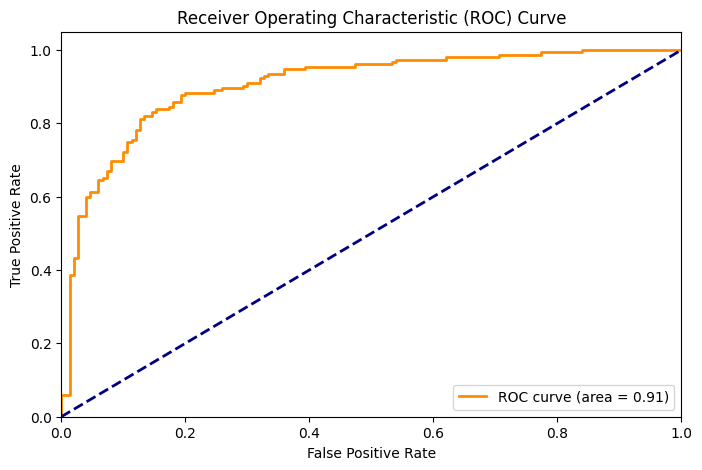

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Step 4-5: Hyperparameter tuning
nb_model.set_params(var_smoothing=2e-8, priors=[0.12, 0.88])

# Step 6: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("Gaussian Naive Bayes Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XGBOOST

Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
Count of each class in the testing set:
output
1    155
0    150
Name: count, dtype: int64
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 87.06%
Training Error: 12.94%
Test Accuracy: 83.61%
Testing Error: 16.39%


True Positives (TP): 130
True Negatives (TN): 125
False Positives (FP): 25
False Negatives (FN): 25

Precision: 0.8387096774193549
Recall: 0.8387096774193549
F1-Score: 0.8387096774193549

Confusion Matrix:

            cardiac  no cardiac
cardiac         130          25
no cardiac       25         125


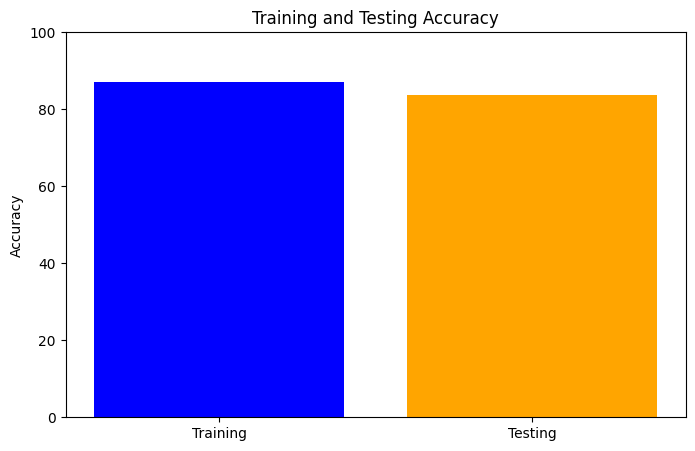


Sample 1: Probabilities - Class 0: 0.0545, Class 1: 0.9455, Prediction: 1
Sample 2: Probabilities - Class 0: 0.8406, Class 1: 0.1594, Prediction: 0
Sample 3: Probabilities - Class 0: 0.2567, Class 1: 0.7433, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0300, Class 1: 0.9700, Prediction: 1
Sample 5: Probabilities - Class 0: 0.3284, Class 1: 0.6716, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0292, Class 1: 0.9708, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9609, Class 1: 0.0391, Prediction: 0
Sample 8: Probabilities - Class 0: 0.2070, Class 1: 0.7930, Prediction: 1
Sample 9: Probabilities - Class 0: 0.6606, Class 1: 0.3394, Prediction: 0
Sample 10: Probabilities - Class 0: 0.6890, Class 1: 0.3110, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0506, Class 1: 0.9494, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5371, Class 1: 0.4629, Prediction: 0
Sample 13: Probabilities - Class 0: 0.3733, Class 1: 0.6267, Prediction: 1
Sample 14: Probabilities - Class 

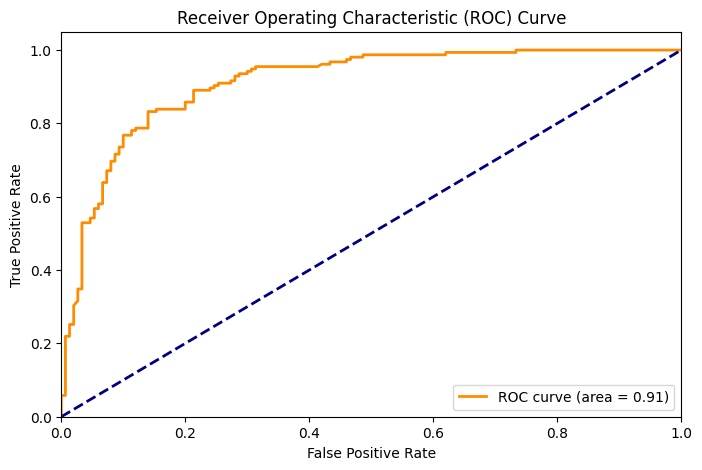

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Calculate the count of each class in the testing set
class_counts = y_test.value_counts()

# Print the count of each class
print("Count of each class in the testing set:")
print(class_counts)


# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=12
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 82.98%
Training Error: 17.02%
Test Accuracy: 82.30%
Testing Error: 17.70%


True Positives (TP): 131
True Negatives (TN): 120
False Positives (FP): 30
False Negatives (FN): 24

Precision: 0.8136645962732919
Recall: 0.8451612903225807
F1-Score: 0.829113924050633

Confusion Matrix:

            cardiac  no cardiac
cardiac         131          24
no cardiac       30         120


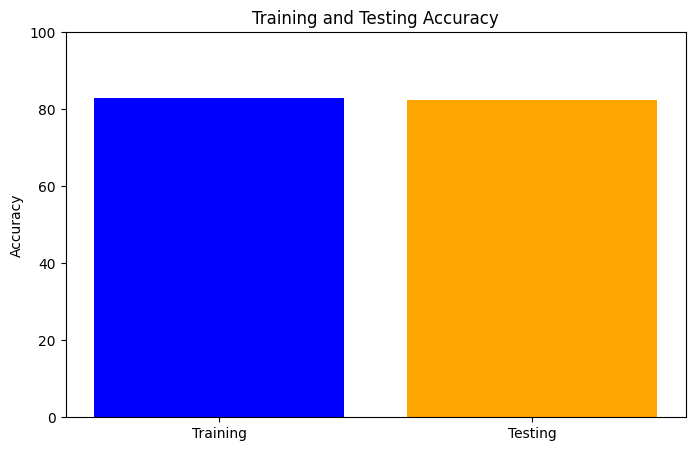


Sample 1: Probabilities - Class 0: 0.3036, Class 1: 0.6964, Prediction: 1
Sample 2: Probabilities - Class 0: 0.6866, Class 1: 0.3134, Prediction: 0
Sample 3: Probabilities - Class 0: 0.2615, Class 1: 0.7385, Prediction: 1
Sample 4: Probabilities - Class 0: 0.1697, Class 1: 0.8303, Prediction: 1
Sample 5: Probabilities - Class 0: 0.5432, Class 1: 0.4568, Prediction: 0
Sample 6: Probabilities - Class 0: 0.1934, Class 1: 0.8066, Prediction: 1
Sample 7: Probabilities - Class 0: 0.7926, Class 1: 0.2074, Prediction: 0
Sample 8: Probabilities - Class 0: 0.1934, Class 1: 0.8066, Prediction: 1
Sample 9: Probabilities - Class 0: 0.6803, Class 1: 0.3197, Prediction: 0
Sample 10: Probabilities - Class 0: 0.5432, Class 1: 0.4568, Prediction: 0
Sample 11: Probabilities - Class 0: 0.1934, Class 1: 0.8066, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5432, Class 1: 0.4568, Prediction: 0
Sample 13: Probabilities - Class 0: 0.5432, Class 1: 0.4568, Prediction: 0
Sample 14: Probabilities - Class 

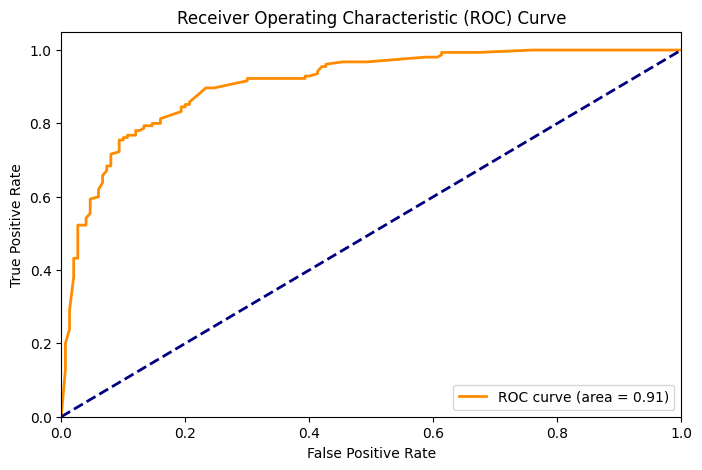

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=70,
    learning_rate=0.02,
    max_depth=3,
    min_child_weight=3
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

MODEL BELOW  HAS A PARAMETER VALUSE THAT CAAN CONSIDERED BEST MODEL, BUT WHEN DEPLOY THE PROGNOSE PROBLEM

Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 87.90%
Training Error: 12.10%
Test Accuracy: 83.93%
Testing Error: 16.07%


True Positives (TP): 132
True Negatives (TN): 124
False Positives (FP): 26
False Negatives (FN): 23

Precision: 0.8354430379746836
Recall: 0.8516129032258064
F1-Score: 0.8434504792332268

Confusion Matrix:
            cardiac  no cardiac
cardiac         132          23
no cardiac       26         124


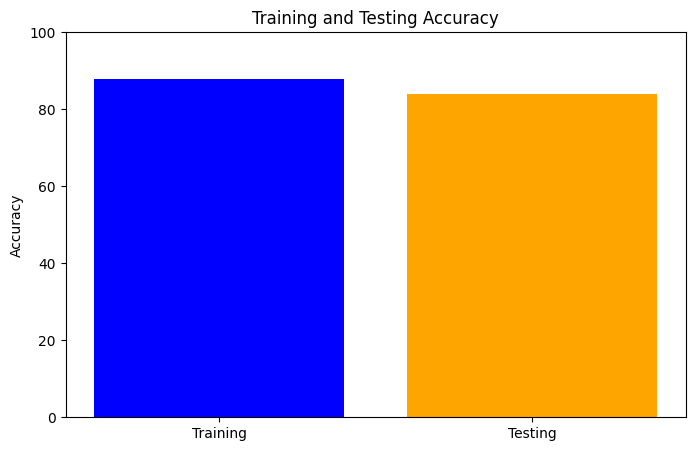


Sample 1: Probabilities - Class 0: 0.0542, Class 1: 0.9458, Prediction: 1
Sample 2: Probabilities - Class 0: 0.8502, Class 1: 0.1498, Prediction: 0
Sample 3: Probabilities - Class 0: 0.3174, Class 1: 0.6826, Prediction: 1
Sample 4: Probabilities - Class 0: 0.0429, Class 1: 0.9571, Prediction: 1
Sample 5: Probabilities - Class 0: 0.3512, Class 1: 0.6488, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0404, Class 1: 0.9596, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9636, Class 1: 0.0364, Prediction: 0
Sample 8: Probabilities - Class 0: 0.2279, Class 1: 0.7721, Prediction: 1
Sample 9: Probabilities - Class 0: 0.7153, Class 1: 0.2847, Prediction: 0
Sample 10: Probabilities - Class 0: 0.5585, Class 1: 0.4415, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0589, Class 1: 0.9411, Prediction: 1
Sample 12: Probabilities - Class 0: 0.5788, Class 1: 0.4212, Prediction: 0
Sample 13: Probabilities - Class 0: 0.3237, Class 1: 0.6763, Prediction: 1
Sample 14: Probabilities - Class 

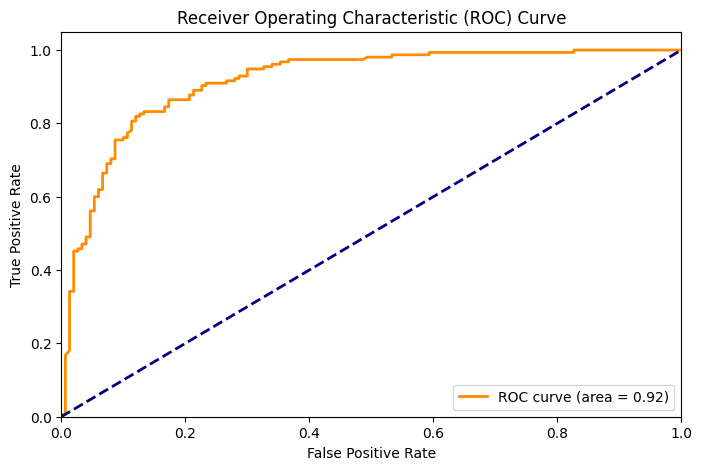

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)
'''
# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=9,
    min_child_weight=19
)'''

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=23,
    learning_rate=0.2,
    max_depth=4,
    min_child_weight=5
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''import optuna
from sklearn.metrics import confusion_matrix

def objective(trial):
    # Define the search space for the threshold
    threshold = trial.suggest_uniform('threshold', 0, 1)

    # Apply the threshold to convert probabilities to binary predictions
    binary_predictions = (probabilities[:, 1] >= threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, binary_predictions)

    # Extract TP and TN counts
    TP = cm[1, 1]
    TN = cm[0, 0]

    # Define the objective as maximizing TP and minimizing TN
    # Optuna maximizes the objective, so we negate TN to minimize it
    return -(TP - TN)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best threshold
best_threshold = study.best_params['threshold']
print("Best Threshold:", best_threshold)
'''

'import optuna\nfrom sklearn.metrics import confusion_matrix\n\ndef objective(trial):\n    # Define the search space for the threshold\n    threshold = trial.suggest_uniform(\'threshold\', 0, 1)\n\n    # Apply the threshold to convert probabilities to binary predictions\n    binary_predictions = (probabilities[:, 1] >= threshold).astype(int)\n\n    # Calculate the confusion matrix\n    cm = confusion_matrix(y_test, binary_predictions)\n\n    # Extract TP and TN counts\n    TP = cm[1, 1]\n    TN = cm[0, 0]\n\n    # Define the objective as maximizing TP and minimizing TN\n    # Optuna maximizes the objective, so we negate TN to minimize it\n    return -(TP - TN)\n\n# Create a study object and optimize the objective function\nstudy = optuna.create_study(direction=\'maximize\')\nstudy.optimize(objective, n_trials=100)\n\n# Get the best threshold\nbest_threshold = study.best_params[\'threshold\']\nprint("Best Threshold:", best_threshold)\n'

In [ ]:
'''from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],

}


# Create the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)'''

'from sklearn.model_selection import GridSearchCV\n\n# Define the hyperparameter grid\nparam_grid = {\n    \'max_depth\': [3, 4, 5, 6, 7, 8],\n    \'min_samples_split\': [2, 4, 6, 8, 10],\n    \'min_samples_leaf\': [1, 2, 4, 8, 10],\n    \'max_features\': [None, \'sqrt\', \'log2\', 0.5, 0.7],\n    \'min_impurity_decrease\': [0.0, 0.1, 0.2, 0.3, 0.4],\n\n}\n\n\n# Create the decision tree classifier\ndt_model = DecisionTreeClassifier(random_state=0)\n\n# Create GridSearchCV\ngrid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring=\'accuracy\')\n\n# Fit the grid search to the data\ngrid_search.fit(X_train_scaled, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", best_params)'

False Positive Impact: False positives (predictions with low probabilities that turn out to be incorrect) may still have some impact, but users may be more tolerant of them compared to false positives in binary classifications. Since the predictions are probabilistic, users may view false positives as lower-risk situations that warrant further monitoring rather than immediate concern.

In [ ]:
'''from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Optuna
def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 10000),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.10, 30.0),
        'max_depth': trial.suggest_int('max_depth', 2, 1000),
        'min_child_weight': trial.suggest_float('min_child_weight', 2, 1000),
    }

    # Create XGBoost classifier with hyperparameters
    model = XGBClassifier(**params)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)  # You can adjust the number of trials

# Get the best hyperparameters
best_params_xgb = study.best_params
best_accuracy = study.best_value

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred = best_xgb_model.predict(X_train_scaled)
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params_xgb)
print("Best Accuracy:", best_accuracy)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)'''

'from xgboost import XGBClassifier\nimport optuna\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\n\n# Feature scaling\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Define the objective function for Optuna\ndef objective(trial):\n    # Define the search space for hyperparameters\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 10, 10000),\n        \'learning_rate\': trial.suggest_uniform(\'learning_rate\', 0.10, 30.0),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 2, 1000),\n        \'min_child_weight\': trial.suggest_float(\'min_child_weight\', 2, 1000),\n    }\n\n    # Create XGBoost classifier with hyperparameters\n    model = X

CAN BE CONSIDERED AS BEST MODEL


Training Features Shape: (711, 11)
Testing Features Shape: (305, 11)
Training Labels Shape: (711,)
Testing Labels Shape: (305,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 100.00%
Training Error: 0.00%
Test Accuracy: 83.93%
Testing Error: 16.07%


True Positives (TP): 132
True Negatives (TN): 124
False Positives (FP): 26
False Negatives (FN): 23

Precision: 0.8354430379746836
Recall: 0.8516129032258064
F1-Score: 0.8434504792332268

Confusion Matrix:
            cardiac  no cardiac
cardiac         132          23
no cardiac       26         124


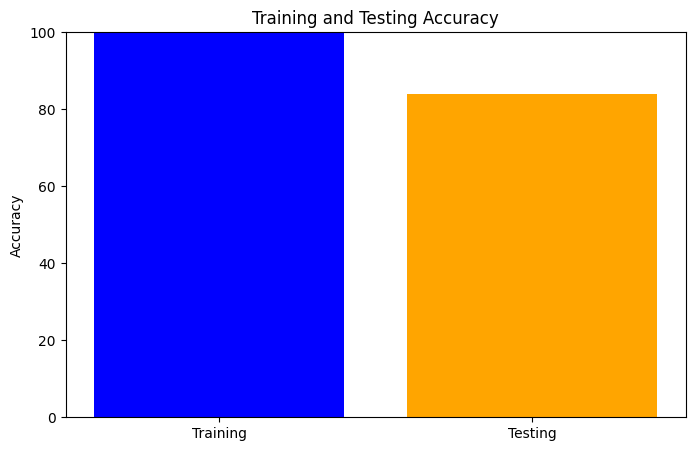


Sample 1: Probabilities - Class 0: 0.0005, Class 1: 0.9995, Prediction: 1
Sample 2: Probabilities - Class 0: 0.9979, Class 1: 0.0021, Prediction: 0
Sample 3: Probabilities - Class 0: 0.7419, Class 1: 0.2581, Prediction: 0
Sample 4: Probabilities - Class 0: 0.0002, Class 1: 0.9998, Prediction: 1
Sample 5: Probabilities - Class 0: 0.0999, Class 1: 0.9001, Prediction: 1
Sample 6: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 7: Probabilities - Class 0: 0.9980, Class 1: 0.0020, Prediction: 0
Sample 8: Probabilities - Class 0: 0.0866, Class 1: 0.9134, Prediction: 1
Sample 9: Probabilities - Class 0: 0.6965, Class 1: 0.3035, Prediction: 0
Sample 10: Probabilities - Class 0: 0.9938, Class 1: 0.0062, Prediction: 0
Sample 11: Probabilities - Class 0: 0.0003, Class 1: 0.9997, Prediction: 1
Sample 12: Probabilities - Class 0: 0.3115, Class 1: 0.6885, Prediction: 1
Sample 13: Probabilities - Class 0: 0.2054, Class 1: 0.7946, Prediction: 1
Sample 14: Probabilities - Class 

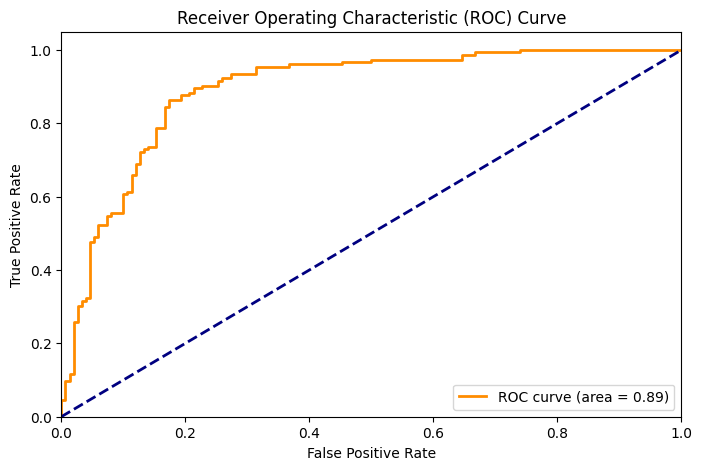

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
'''Best Hyperparameters: {'n_estimators': 1742, 'learning_rate': 0.11475543585990611, 'max_depth': 541, 'min_child_weight': 2.4235100909046174}
Best Accuracy: 0.8557377049180328
Training Accuracy: 1.0
Testing Accuracy: 0.8557377049180328'''
# Step 1: Split the dataset into training and testing sets
X = combined_df.drop(columns=['output'])  # Features
y = combined_df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=2535,
    learning_rate=0.11535732995884353,
    max_depth=204,
    min_child_weight=2.3141565413238108
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()